<details>
   <summary>Metadata</summary> 
    title: "E-TRAINEE Principles and basic algorithms of 3D change detection and analysis"<br>
    description: "This is the third theme within the 3D/4D Geographic Point Cloud Time Series Analysis module."<br>
    dateCreated: 2023-02-28<br>
    authors: Katharina Anders, Bernhard Höfle<br>
    contributors: Sina Zumstein<br>
    estimatedTime: 1.5 hours <br>
</details>

# Principles and basic algorithms of 3D change detection and analysis

This theme is about principles of change detection and analysis in 3D point clouds and introduces algorithms for deriving change information from multitemporal point clouds and 3D time series.

You will learn about: 
* <a href="#terminology-of-3d-change-analysis">Terminology of 3D change analysis</a>
* <a href="#approaches-to-3d-change-analysis">Approaches to 3D change analysis</a>
* <a href="#a-change-analysis-workflow-in-methods">A change analysis workflow in methods</a>
    * <a href="#point-cloud-alignment">Point cloud alignment</a>
    * <a href="#change-detection-and-quantification">Change detection and quantification (surface change analysis)</a>
    * <a href="#uncertainty-of-change-analysis">Uncertainty of change analysis</a>
    * <a href="#representation-of-change-analysis-results">Representation of change analysis results</a>

<a id='terminology-of-3d-change-analysis'></a>
## Terminology of 3D change analysis

Change in 3D point cloud data can regard any attribute or property. Since we are dealing with topographic data, we will focus on geometric change in this course, i.e. changes in the elevation or morphology of the terrain surface. However, the same principles apply to other attributes, for example the intensity or color of the point cloud data, geometric properties, such as the roughness or shape, or object properties, such as the vitality of vegetation (e.g., NDVI) or the temperature (e.g., thermal measurements). 

In general, we distinguish the terms of change detection and change analysis. **Change detection** is the process of identifying the existence of change in its location and maybe extent. It regards binary change information, i.e. a location or object has changed or not (0/1). For example, [this web service](http://skynet.elte.hu/tudelft/vgc2016.html) provides information if a building was added or removed (positive or negative values), but already provides a quantification of the corresponding height change (<a href="#references">Cserép & Lindenbergh, 2023</a>):

<center>
<img src="media/m3_theme3_building_change_detection.png" alt="binary_building_change" title="Map of building changes" width="800">

<i>Map of building changes derived from airborne laser scanning (ALS) in the Netherlands. Figure from [http://skynet.elte.hu/tudelft/vgc2016.html](http://skynet.elte.hu/tudelft/vgc2016.html) by [Cserép & Lindenbergh (2023)](https://doi.org/10.1016/j.jag.2022.103174) / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i></center>

Accordingly, **change analysis** comprises the process of quantifying the magnitude of change and other properties, e.g. deriving the change rate. It can further comprise the attribution of semantics, i.e. the type of change. For building change, this may be categories of "newly built", "demolished", "extended", etc. 
In the example of building change above, the changes are derived in vertical direction, i.e. as local changes in height. **One-dimensional changes** in topographic applications are typically oriented in Z direction to reflect a surface increase or lowering. 
Changes may be derived in 2D, for example, as change in location, i.e. horizontal displacement.
**3D changes** regard the occupancy of 3D space (and therein distances between two states) or changes in sizes and/or shapes.
Changes may be **higher-dimensional** (i.e., >3D), if they comprise all of the above aspects and additionally changes in feature space (<a href="#references">Eitel et al., 2016</a>).

Change analysis is straightforward, if we are dealing with simple objects, a high **signal-to-noise ratio**, a low number of epochs in multitemporal data, and if processes are known or certain types of changes expected (i.e., specific magnitudes or locations). In remote sensing and geographic applications, many of these aspects usually do not apply. We are rather dealing with changes at small scales compared to associated uncertainties (cf. section on <a href="#uncertainty-of-change-analysis">uncertainty of change analyis</a>), objects or features in a scene may be difficult to recognize (even for human interpreters), and objects are irregular, i.e. not following simple geometric primitives that are easily identifiable by algorithms.
Further, we are typically dealing with large and detailed scenes and many epochs to assess for changes (even time series). Furthermore, data of multiple epochs may originate from different sources with different properties of, e.g., coverage, spatial resolution, and uncertainty.

This theme will introduce you to these different aspects and how to approach change analysis of natural, geographic phenomena using 3D point clouds.

<a id='approaches-to-3d-change-analysis'></a>
## Approaches to 3D change analysis
A variety of approaches exist in 3D change analysis to detect and quantify changes in multitemporal point clouds, typically using pairs of epochs acquired
at two different points in time. These approaches can be broadly categorized into object-based change analysis, feature-based analysis and tracking, and surface change analysis.

<a id='object-based-change-analysis'></a>
### Object-based change analysis

Object-based approaches of change analysis commonly detect objects or meaningful features within each epoch of a scene for assessing changes in their state. This may regard, e.g., their location, geometry, or size. For this, objects or segments are first extracted in single point cloud epochs, and therein identified (semantically) and characterized (e.g., in their shape or other properties that are monitored). Monitoring of each object's state is realized by repeating this object identification for each new epoch. 
Object-based change analysis in environmental and geographic applications may target, for example, trees regarding changes in height, crown extent or trunk size (e.g., <a href="#references">Chen et al., 2022, Xiao et al., 2016</a>):

<center> <img src="media/m3_theme3_chenetal_tree_object_change.jpg" alt="tree_change_analysis" title="Tree change analysis" width="600">

<i>Object-based change analysis of trees using terrestrial and UAV LiDAR point clouds. Individual tree objects are identified in the point cloud to derive change in tree height and diameter at breast height. Figure by <a href="https://doi.org/10.1109/ACCESS.2022.3151685">Chen et al. (2022)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i></center>

Object-based change analysis typically follows this workflow:

1. Object **extraction**: Objects or their components (segments) are extracted from single point cloud epochs.
2. Object **identification**: Objects are re-identified between epochs, e.g., the same tree, typically based on location if there is no strong movement involved.
3. Object **characterization**: The state of individual objects is derived, e.g. their shape, size, etc.
4. Object **monitoring**: Steps 1-3 are repeated for each epoch to assess their change over time.

The result of the analysis may be binary detection if the object is still there or gone, or the change in derived properties, such as shape, size, or even location for moving objects.

Accordingly, objects may also be components of geomorphic phenomena, such as a landslide scarp, whose size, shape and location are monitored over time (e.g., <a href="#references">Mayr et al. 2017</a>):

<center> <img src="media/m3_theme3_mayretal_landslide_object_change.png" alt="tree_change_analysis" title="Tree change analysis" width="800">

<i>Object-based change analysis of landslide components in terrestrial laser scanning point clouds. Figure modified from <a href="https://doi.org/10.5194/isprs-archives-XLII-2-691-2018">Mayr et al. (2018)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i></center>

<a id='feature-based-change-analysis'></a>
### Feature-based change analysis

Feature-based change analysis uses features in the 3D scene to derive their change or displacement. Features may be meaningful, such as breaklines representing a landslide scarp, or ridges representing dune crests. In this case, feature-based approaches are similar to object-based analysis. Features may also be simple geometric primitives, such as planes or lines. Feature descriptors can also be derived per point, based on local neighborhood properties. As such, features are often handcrafted, meaning they are defined by the analyst based on knowledge about the application domain. Therein, a combination of geometric and spectral features (e.g. multispectral/hyperspectral image texture) may be used (cf. <a href="#references">Qin et al., 2016</a>). 

As geometric features, the aim is typically to obtain features that are translation- and rotation-independent, such as local surface normals, curvature, and others. To be re-identifiable between epochs, we need to assume a certain degree of rigidity, so that the features do not change with the deforming object. Recently, also learned features are derived for change analysis, e.g., using deep learning approaches (e.g., <a href="#references">Gojcic et al., 2021</a>).

**Feature tracking** can then be realized by matching features in different epochs of a scene. <a href="#references">Gojcic et al. (2021)</a> present such a method to assess landslide displacements. They establish feature correspondences between epochs by performing a nearest neighbor search in feature space. From these correspondences, 3D displacement vectors can be derived from the coordinate locations of the features:

<center> <img src="media/m3_theme3_gojcic_etal_displacement_vector.png" alt="displacement_vectors" title="Displacement vectors from feature correspondences" width="400">

<i>Feature-based change analysis by establishing correspondences between geometric features and deriving their displacement as 3D vectors between coordinate locations in two epochs. Figure modified from <a href="https://doi.org/10.1007/s10346-021-01761-y">Gojcic et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i></center>

Another approach to feature-based change analysis is provided with the so-called baseline method by <a href="#references">Shen et al. (2017)</a>. The concept is to establish baselines between features within on single point cloud epoch. Subsequently, the baselines connecting corresponding points are compared between epochs in order to derive changes. Also here, features may be geometric neighborhood features (virtual points) or correspond to object features that can be identified in the scene. In their paper, the method is demonstrated to assess structural damage on a building after an earthquake (with data generated in a lab experiment). The (virtual) feature points are located at the center of bricks, and by establishing the baseline changes, finally 3D displacement vectors can be derived:

<center> <img src="media/m3_theme3_shen_etal_baseline.png" alt="baseline_method" title="Displacement vectors from baseline method" width="800">

<i>Feature-based change analysis with the baseline method by (A) establishing baselines between features within each epoch and subsequently assessing their changes. From this, (B) displacement vectors of feature points can be derived, independent from accurate co-registration. Figure modified from <a href="https://doi.org/10.3390/s17010026">Shen et al. (2017)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i></center>

The advantage of the baseline method is that the change analysis is not depending on the accuracy of co-registration, compared to other approaches which derive change values as point or object distances between epochs (<a href="#references">Shen et al., 2017</a>).

<a id='surface-change-analysis'></a>
### Surface change analysis

Surface change analysis is performed by comparing a model of a scene’s surface, commonly the terrain, between pairs of epochs. A basic method is to derive the **difference between digital elevation models (DEMs)** (<a href="#references">James et al.,  2012</a>) derived from each point cloud epoch. Therein, point cloud data is gridded into a DEM. The elevation value within each raster cell can then be subtracted, and the difference between elevations represents the change in height at each location. The resulting DEMs of difference (so-called DoDs) provide changes that are directed purely orthogonally to the (commonly vertical) orientation of a rasterized scene. The advantages of this method are that the analysis is simple and computationally efficient (i.e. fast raster-based analysis). DEM differencing is therefore useful for planar surfaces without a strong 3D morphology.

<center>
<img src="media/m3_theme3_dod.png" alt="dod_schematic" title="Schematic of DoD" width="500">

<i>Schematic of changes derived from differencing two epochs of digital elevation models (DEMs), which are derived vertically. Depending on the direction of change, DEM differences do not necessarily represent the true distance. Figure by course authors.</i></center>

The drawback of DEM differencing is visualized in the schematic figure above: if the surface and the direction of change are not directed vertically (i.e. orthogonally to the surface orientation in the raster), the difference value will not represent the true distance of surfaces between two epochs. Derived changes are then not topographically meaningful, for example, at slopes or on the side of objects. In general terms, the direction of differencing is always sensitive to the rotation of the point cloud. 

Further, seeing that DEM differencing is a raster-based approach, the same general limitations compared to point cloud analysis apply (cf. [Theme 1](../01_pointcloud_principles/01_pointcloud_principles.md#point-cloud-data-model)): The requirement to choose a fixed cell size is challenging where surfaces are rough or point densities vary across a scene. The level of detail is thereby fixed to a certain user-defined resolution.

To maintain the advantages of point cloud analysis and the full 3D representation of surfaces, approaches of direct point cloud comparison are available.
A simple approach to point cloud-based surface change analysis is so-called direct **cloud-to-cloud comparison** (C2C; <a href="#references">Girardeau-Montaut et al., 2005</a>). C2C distances are derived as Hausdorff distances, so the distance to the closest neighboring 3D point in the compared epoch for each point of a reference epoch:

<center>
<img src="media/m3_theme3_c2c.png" alt="c2c_schematic" title="Schematic of C2C" width="500">

<i>Schematic of changes derived as cloud-to-cloud (C2C) distances between two epochs of point clouds compared to the true distance from a point at epoch t2 to the true surface in epoch t1. Figure by course authors.</i></center>

Caveats for the C2C method are that it is sensitive to roughness of surfaces in the point cloud, sensitive to outliers, and to an uneven point distribution. Accordingly, the nearest point in the compared point cloud does not necessarily represent the same surface or similar surface position (see true distance vs. C2C distance in the schematic figure above).

To overcome this and better ensure that similar surfaces are compared, an advanced method of point cloud-based surface change analysis is provided by the **multiscale model-to-model cloud comparison (M3C2)** (<a href="#references">Lague et al., 2013</a>). The M3C2 algorithm calculates the distance between point clouds of two epochs in the direction of the local surface normal at specific 3D locations called ’core points’. Accordingly, a plane is fit to the points in a neighborhood of defined radius around a core point. The surface position is averaged for points within a cylinder with a diameter defined by the ’projection scale’ which is oriented along the normal direction. The distance is then computed along this normal direction to the averaged surface position of points in the compared point cloud, i.e. where the projection cylinder intersects the point cloud of the second
epoch. Please read the article by <a href="#references">Lague et al. (2013)</a> to understand the algorithm in detail.

<center>
<img src="media/m3_theme3_zahs_etal_m3c2.png" alt="m3c2_algorithm" title="Schematic of M3C2 distance computation" width="500">

<i>Schematic of point cloud distance computation with the M3C2 algorithm (<a href="#references">Lague et al., 2013</a>). Figure by V. Zahs modified from [Zahs et al. (2022)](https://doi.org/10.1016/j.isprsjprs.2021.11.018).</i></center>


With this concept, the M3C2 is less sensitive to effects of surface roughness: Local planarity is assumed, so that a plane can be adjusted to the point neighborhood, rather than using each point position directly as in the C2C distances. With the surface normal orientation, a further benefit is that **signed distances** are provided. We thereby derive not only a change value, but can also infer surface increase or decrease (e.g. accumulation and erosion) from the resulting positive or negative change values. Deriving the direction of movement normal (i.e. orthogonally) to the local surface is useful for many applications (but not all, see e.g. <a href="#references">Williams et al., 2021</a>).

There is another special capability of the M3C2 algorithm we should look at, namely the **multi-scale** aspect. We have learnt that the M3C2 assumes local planarity, to derive surface change in the direction of local surface orientation. As you know about point cloud characteristics, planarity depends on the surface roughness and is thereby scale-dependent (you may revisit this aspect in the [first theme of this module](./../01_pointcloud_principles/01_pointcloud_principles.md)). Accordingly, the ideal radius for normal estimation, at which the surface is most planar, depends on the roughness of the local surface, which can be highly variable within a scene. To account for this, the M3C2 takes a set or a range of radii as input, and calculates the normal vector for each of these radii. Finally, the normal radius at each core point is selected as such that the adjusted plane has the lowest residuals (i.e., low roughness or high planarity). You make use of this multi-scale aspect in the <a href="#exercise">exercise of this theme</a>.

The M3C2 is therefore a widely established algorithm of 3D change analysis in geoscientific applications using conventional multitemporal point cloud data (usually much less than 100 epochs) of complex scenes, such as rock glaciers (<a href="#references">Zahs et al., 2019</a>), glaciers (<a href="#references">Rossini et al., 2018</a>), and landslides (<a href="#references">Mayr et al., 2018</a>) in high-mountain landscapes, thaw subsidence (<a href="#references">Marx et al., 2017</a>) and slumping (<a href="#references">Barnhart and Crosby, 2013</a>) in Arctic permafrost landscapes, or cliff erosion (<a href="#references">Gómez-Gutiérrez and Gonçalves, 2020</a>) and beach dynamics (<a href="#references">Corbí et al., 2018</a>) in coastal environments. 


<a id='uncertainty-in-change-analysis'></a>
## Uncertainty in change analysis

<a id='sources-of-uncertainty'></a>
### Sources of uncertainty
Change analysis - as any analysis or quantification in our data - is always associated with some degree of **uncertainty stemming from different sources**. One source of uncertainty influencing the analysis is the **geometric accuracy of single epochs**. This accuracy is influenced by instrument errors, such as the angular resolution of a laser scanner or the positional accuracy of LiDAR measurements. LiDAR measurements are further influenced by the target geometry, for example if a very rough surface of edge is hit. This influence increases with the range and incidence angle of the diverging laser beam due to its increasing footprint. Also the surface characteristics themselves influence the measurement, e.g. presence of moisture or weathering. 
Further, atmospheric conditions influence the LiDAR measurement depending on the temperature, pressure, and humidity affecting the speed and refraction of light travel. This effect is especially difficult to model, but does become notable with highly frequent repetitions of scans, as we introduce with the LiDAR time series in the [subsequent theme](../04_3d_timeseries_analysis/04_3d_timeseries_analysis.ipynb).
For more details on these aspects of point cloud accuracy, have a look at <a href="#references">Soudarissanane et al. (2011)</a> and watch [this lecture video](https://youtu.be/1HZH06bZk5A?t=1328) (by Christoph Holst).

The measurement uncertainty of single epochs directly **propagates into change analysis**. Imagine a simple example: If a specific point in your scene is measured as a 3D coordinate with an (in practice unknown) error of, say, 1 mm and the same unchanged position is measured again at the same error of 1 mm, the distance between the two coordinates is derived with 2 mm even though no change occurred. In another scenario, the actual point position may have moved by 2 mm. If the coordinate measurements are off by 1 mm 'towards each other', their distance will be quantified with 0 mm, i.e. no change could be identified. This is a highly fictious example, but should emphasize the importance to consider sources of error and using means to assess uncertainty in a quantitative way. Before we have a look at these methods, some further important uncertainty sources shall be introduced in the following.

The scanning mechanism as well as the scanning geometry further influence the **point sampling** on the target surface. Importantly, this sampling will always be at least slightly different when repeating the acquisition, even from the very same instrument position, e.g. in permanent laser scanning. A distance from a point in one epoch to the nearest point in the other epoch may therefore partly or solely stem from this sampling effect, while the points are sampled from the same, unchanged surface.

<center>
<img src="media/m3_theme3_sampling.png" alt="sampling" title="Effect of sampling on change assessment" width="400">

<i>Differing sampling of points on a surface in two epochs due to effects of the scanning mechanism and influence of the scanning geometry (roughness). Figure by course authors, following <a href="http://etheses.dur.ac.uk/12172/">Williams (2017)</a>.</i></center>

Another source of uncertainty is the **survey geometry**. We know about the influence of ranging accuracy, incidence angles, and occlusion effects in single point cloud acquisitions. When repeating a measurement, we also need to consider that the surface change itself influences how we sample the surface and what parts of a scene (cf. [Girardeau-Montau et al., 2005](#references)):

<center>
<img src="media/m3_theme3_gm_survey_geom.png" alt="survey geometry" title="Effect of survey geometry on change assessment" width="300">

<i>Survey geometry as a source of uncertainty if occluded areas change due to changes (surface displacement) in the target scene. Figure by <a href="#references">Girardeau-Montaut et al. (2005)</a> / [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/).</i></center>

This can influence your change analysis, because the occluded areas change, so that you may not find corresponding surfaces in all parts of the data. If you are not aware of this effect in a scene, it can even lead to errors in change assessment. This is the case, for example, if a surface in one epoch is compared to another surface in the other epoch, which is not corresponding in reality.

Another **influence of scene dynamics** can be seasonal effects, such as leaf-on and leaf-off conditions for vegetation, the dryness of a river bed, or snow cover, all depending on the target scene and the variable of interest (<a href="#references">Qin et al., 2016</a>).

Of course, any data acquisition setup will be designed to minimize errors and influences as much as possible. In practice, the acquisition design is always constrained by the circumstances, which instrument is available, what are the scene characteristics, etc. 

For all remaining uncertainty, there are methods to assess the uncertainty in a quantifiable manner. Based on this, we can test the significance of derived changes regarding the quality and properties of our data.

<a id='assessment-of-uncertainty'></a>
### Assessment of uncertainty

The analysis and interpretation of change requires us to assess - considering all uncertainties - the accuracy of the change detection and quantification. A key concept here is the **minimum detectable change**, so the question: Considering the [sources of uncertainties](#sources-of-uncertainty), what is the minimum change value at which we can confidently detect change, i.e. separate it from noise or other effects? A common term used for the determined minimum detectable change value is the **level of detection** (<a href="#references">Lague et al., 2013, Wheaton et al., 2010</a>).

A simple way of assessing uncertainty in terms of a minimum detectable change is to look at the distribution of change values in areas that are presumed stable (i.e. actually unchanged). Any change values, i.e. distances between stable surfaces, can be assumed to stem from a registration error and noise (wherein noise here includes all <a href="#sources-of-uncertainty">sources of uncertainty in the measurements</a>). In this way, the minimum detectable change can be derived via a statistical test, for example, a t-test using as threshold the 95th percentile of change values across stable surfaces (<a href="#references">Wheaton et al., 2010</a>). This provides a single level of detection value for the entire scene, which can be used, e.g., to mask out all change values that are not statistically significant.

[comment]: <> (Spatially variable uncertainty quantification)
As we are aware of spatially variable properties of our data in the scene, such as variable point density or variable measurement uncertainty due to different surface characteristics, it is desirable to account for this in a **spatially variable uncertainty** assessment. If considered, this means that we may be able to detect smaller changes in certain areas that are, e.g. highly planar and densely sampled, whereas we can confidently detect only larger changes in areas that are sparsely sampled and/or exhibit high surface roughness.

An approach to quantify spatially variable uncertainty for 3D point cloud comparison is included in the M3C2 algorithm (<a href="#references">Lague et al., 2013</a>). This level of detection is based on the registration accuracy for a pair of point clouds as one global value for the scene, and the local surface roughness for each point where change is derived. Since the M3C2 distance is derived for local estimates of 3D planar surfaces, also the surface roughness and point density are estimated at this local scale and surface orientation. As you remember from the concept of the <a href="#surface-change-analysis">M3C2 algorithm above</a>), it considers a cylindrical neighborhood around each core point for an averaged distance calculation along the normal direction of the locally adjusted plane.
According to <a href="#references">Lague et al. (2013)</a>, the Level of Detection for each core point at which distance is calculated is derived as follows:

$$ 
LoD_{95\%} = \pm 1.96 \left(\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} + reg \right)
$$

where reg denotes the global registration error, i.e. a uniform value for the entire scene for two point cloud epochs. How this can be derived, you will learn [later in this theme](#point-cloud-alignment) as part of the change analysis workflow. $\sigma_1^2$ and $\sigma_2^2$ denote the point position variances in epochs 1 and 2, respectively, which represent the local roughness. $n_1$ and $n_2$ are the number of points in each epoch, i.e. the size of the distribution. In this formulation, the two samples are assumed to be two independet Gaussian distributions (see schematic figure below). The factor of $1.96$ is used to derive the level of detection $LoD_{95\%}$ of these distributions in combination with the registration error at 95 % confidence. For stricter or looser confidence intervals, the value may be adapted. But the given formulation has become the de-facto standard in level of detection quantification in point cloud change analysis.

<center>
<img src="media/m3_theme3_lodetection.png" alt="lodetection" title="Estimation of level of detection in the M3C2 algorithm" width="150">

<i>Estimation of level of detection in the M3C2 algorithm as the distribution of points of epochs 1 and 2 along the cylinder axis oriented in normal direction. Figure by L. Winiwarter, modified from <a href="https://doi.org/10.1016/j.isprsjprs.2021.06.011">Winiwarter et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i></center>

The level of detection value derived at each core point can now be used to determine if the corresponding change value (specifically, e.g., M3C2 distance value) is statistically significant. If ${M3C2\:distance} > LoD_{95\%}$, we can consider it significant change. If ${M3C2\:distance} \leq LoD_{95\%}$, the change is not statistically significant, i.e. cannot be confidently separated from noise.

With this, you know the theoretical concepts of change analysis and uncertainty assessment in 3D/4D change analysis of point clouds. In the following, we will continue by working through a change analysis workflow, detailing the required steps in a practical example.

<a id='a-change-analysis-workflow-in-methods'></a>
## A change analysis workflow in methods

So far, we have looked at approaches and theoretical concepts to assessing change. In the following, specific methods will be introduced along the steps of a typical change analysis workflow ([cf. Theme 1](../01_pointcloud_principles/01_pointcloud_principles.md)):

1. Data acquisition
2. Co-registration 
3. Change detection and quantification
4. Uncertainty assessment
5. Change representation

Multitemporal data acquisition is introduced in [Theme 1](../01_pointcloud_principles/01_pointcloud_principles.md). So we start at the typical task of co-registration, i.e. the <a href="#point-cloud-alignment">alignment of multitemporal point clouds</a>.

We start the change analysis workflow by reading two epochs of input point clouds. For the lesson in this theme, we will continue using the data of Hellstugubrean (data directory `hellstugubrean`), which you worked with in the [previous theme](../02_pointcloud_programming_python/02_pointcloud_programming_python.ipynb). For reading point clouds from las, we use the same function defined which is stored in a supplementary script file `pointcloud_funcs`. 


Visualize the data colored by elevation (because we did not load any attribute information, just XYZ coordinates):

In [ ]:
# add the script assets folder to the path, so that we can import the functions created there
import sys
from pathlib import Path
sys.path.insert(0, str((Path.cwd() / ".." / ".." / "assets" / "python_functions").resolve()))

# import point cloud functions
import pointcloud_functions as pcfuncs

# define path to point cloud files
data_path = 'path-to-data'

# read data
las_data2017 = f'{data_path}/hellstugubrean_2017.las'
las_data2009 = f'{data_path}/hellstugubrean_2009_prealignment.las'
data_2009 = pcfuncs.read_las(f'{data_path}/hellstugubrean_2009_prealignment.las')
data_2017 = pcfuncs.read_las(las_data2017)

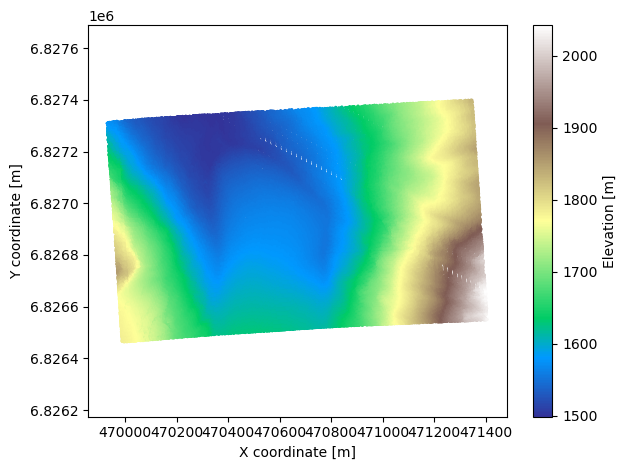

In [2]:
# importing required modules
import matplotlib.pyplot as plt

# allow interactive rotation in notebook
#%matplotlib notebook

# create the figure object
fig, ax = plt.subplots()
ax.axis('equal') # make axis ratio equal to avoid distortion between x and y

# scatter the x and y coordinates and color by intensity
nth = 10 # use only every n-th point to improve visibility
sp = ax.scatter(data_2009[:,0][::nth], data_2009[:,1][::nth], c=data_2009[:,2][::nth], cmap='terrain', s=1)

# set axis to be equally scaled
ax.set_aspect('equal')  

# add title and axis labels
ax.set_xlabel('X coordinate [m]')
ax.set_ylabel('Y coordinate [m]')

# add a colorbar legend
cb = plt.colorbar(sp)
cb.set_label('Elevation [m]')

# cleanly fit plots within figure
plt.tight_layout()

# show the plot in interactive mode
plt.show()

<a id='point-cloud-alignment'></a>
### Point cloud alignment

To ensure that we are only analyzing actual change between surface in the data, in this step we need to ensure that the two point clouds are well aligned. Even though both datasets are georeferenced, small offsets (translation and rotation) are still possible. Since the measurement accuracy of our instruments (here mm-scale laser scanning) is higher than the georeferencing accuracy (usually cm-scale GNSS), we can use the dense spatial sampling of the surface to improve the alignment (or co-registration). This is based on the principle that stable, unchanged surfaces in the scene can be used to minimize their distances. In other words: we align those parts of the data, where we expect no change and thus a highly similar surface representation and position in the point cloud epochs.

As the relative representation of the scene (i.e. scaling) in our laser scanning point clouds is of high metric accuracy, we apply a [rigid body transformation](../01_pointcloud_principles/01_pointcloud_principles.md). For this, we use the so-called iterative closest point (ICP) algorithm (<a href="#references">Besl & McKay, 1992</a>). This algorithm keeps one set of points (point cloud epoch 1) fixed and iteratively transforms another set of points (point cloud epoch 2) rigidly to minimize the distances between points in the point sets to their closest neighbors. Therein, the transformation usually starts with an initial guess and then proceeds as long as the distances are reduced by further transformation (here, translation and rotation of the point set). Once an optimum is reached, the final transformation is applied and/or a transformation matrix is yielded as result. To learn more about the ICP algorithm in the context of point cloud registration, follow [this lecture video](https://youtu.be/ktRqKxddjJk?t=374) (by Cyrill Stachniss).

By the way, an ICP method is [available in CloudCompare](https://www.cloudcompare.org/doc/wiki/index.php/ICP), as in many other point cloud processing tools. In this session, we will make use of an automatic procedure in [PDAL](https://pdal.io/en/latest/stages/filters.icp.html) - so let's continue with the analysis.

For our exercise dataset, we will make a simple separation into changed and unchanged areas using the polygon of the glacier outline provided with `hellstugubrean_2009.shp`. Note that this is not necessarily ideal, as also other parts surrounding the glacier may have changed during the analysis timespan. For a thorough analysis, it would be better to narrow down the areas, e.g. of rock outcrop, where we are more confident that they are stable than, e.g., debris- or snow-covered surfaces. To revisit spatial subsetting of point clouds, you may revisit the respective part in [Theme 2](../02_pointcloud_programming_python/02_pointcloud_programming_python.ipynb).

In [3]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

# define path to shapefile
shp_file = f'{data_path}/hellstugubrean_2009.shp'

datasource = gpd.read_file(shp_file)

if datasource is None:
    print(f'Could not open shapefile {shp_file}.')
else:
    polygons = gpd.GeoSeries(datasource['geometry'])

# create boolean array to mask points (initialize all entries as False)
mask_polygon_2009 = np.full(len(data_2009), fill_value=False, dtype=bool)

# loop over xy coordinates of all points
for pt_id, (x,y) in enumerate(data_2009[:,:2]):
    point=Point([x,y])
    
    # check distance of this point to all polygons
    for poly in polygons:
        distance= poly.distance(point)
         
        # set mask to True, if point is inside polygon
        if distance <= 0.0:
            mask_polygon_2009[pt_id] = True 

# mask the point cloud array where NOT true 
data_2009_noglacier = data_2009[~mask_polygon_2009]

# do the same masking for the other epoch
mask_polygon_2017 = np.full(len(data_2017), fill_value=False, dtype=bool)
for pt_id, (x,y) in enumerate(data_2017[:,:2]):
    point=Point([x,y])
    for poly in polygons:
        distance= poly.distance(point)
        if distance <= 0.0:
            mask_polygon_2017[pt_id] = True
data_2017_noglacier = data_2017[~mask_polygon_2017]

Visualize the data after masking out the glacier area:

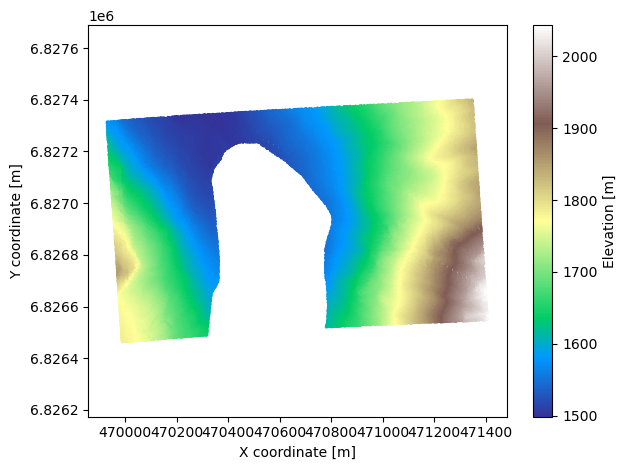

In [4]:
# create the figure object
fig, ax = plt.subplots()
ax.axis('equal') # make axis ratio equal to avoid distortion between x and y

# scatter the x and y coordinates and color by intensity
nth = 10 # use only every n-th point to improve visibility
sp = ax.scatter(data_2009_noglacier[:,0][::nth], data_2009_noglacier[:,1][::nth], c=data_2009_noglacier[:,2][::nth], cmap='terrain', s=1)

# set axis to be equally scaled
ax.set_aspect('equal')  

# add title and axis labels
ax.set_xlabel('X coordinate [m]')
ax.set_ylabel('Y coordinate [m]')

# add a colorbar legend
cb = plt.colorbar(sp)
cb.set_label('Elevation [m]')

# cleanly fit plots within figure
plt.tight_layout()

# show the plot in interactive mode
plt.show()

For this area outside the glacier, where we expect little to no changes, we can use a nearest neighbor search between the two point cloud epochs as a simple approach to check the distances:

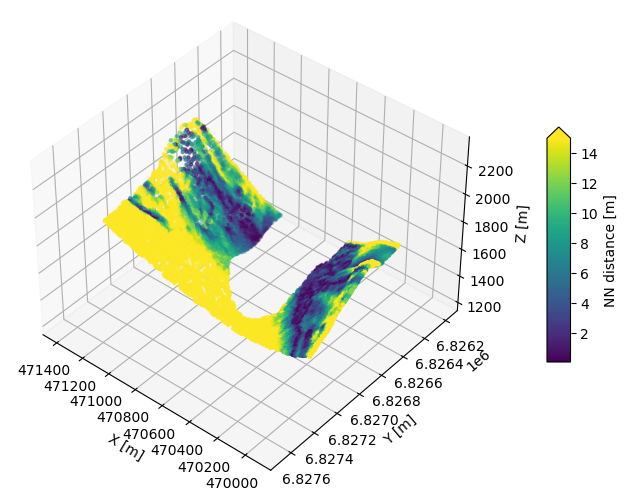

Median distances: 9.44 m
Stdev. of distances: 8.71 m


In [5]:
# import required module
from scipy.spatial import KDTree

# build kd-tree from 3D coordinates
tree2017 = KDTree(data_2017_noglacier)

# query indices of nearest neighbors of 2009 coordinates in 2017 kd-tree
nn_dists = tree2017.query(data_2009_noglacier, k=1)

# obtain distances as first element in tuple returned by query above
distances = nn_dists[0]

# create a figure with 3D axis (two columns for different coloring)
fig, ax = plt.subplots(1,1,subplot_kw={"projection": "3d"},figsize=(7,5))

nth=100

# plot the point cloud colored by height (z values)
s = ax.scatter(data_2009_noglacier[::nth,0], data_2009_noglacier[::nth,1], data_2009_noglacier[::nth,2], s=5,
                   c=distances[::nth], vmax=15.0)

# set axis to be equally scaled
ax.set_aspect('equal')          

# label axes and add title
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')

# set initial view of 3D plot
ax.view_init(elev=40., azim=130.)

# add a colorbar
fig.colorbar(s, shrink=.5, aspect=10, label='NN distance [m]', ax = ax, pad=0.1, extend='max')

# show the plot
plt.tight_layout()
plt.show()

print(f'Median distances: {np.median(distances):.2f} m')
print(f'Stdev. of distances: {np.std(distances):.2f} m')

From the statistics, we can see that most distances are around 9.5 m (median) with a standard deviation of 8.7 m. The corresponding plot shows that some parts of the scene have much lower distances (< 8.0 m). Probably, we are dealing with some areas which exhibit actual change of the surface - otherwise we would see a more systematic spatial distribution of distances. 

For a real analysis, it would be advisable to further restrict the stable areas during transformation, e.g. by selecting rock outcrops and excluding debris- or snow-covered surfaces. In this lesson, for simplicity, we will input the entire 'no glacier' point clouds into the ICP point cloud alignment.

We use the [ICP method in PDAL](https://pdal.io/en/latest/stages/filters.icp.html) to derive the transformation matrix of our point cloud. For an introduction on the use of PDAL in Python, see the [lesson contents of Theme 2](../02_pointcloud_programming_python/02_pointcloud_programming_python.ipynb). As input, the ICP filter in PDAL requires two `las` point cloud files: one epoch that is fixed (reference), and one epoch that is moving (to be aligned). 

In [6]:
# store the no glacier point clouds as las files
las_data2009_noglacier = f'{data_path}/hellstugubrean_2009_prealignment_noglacier.las'
pcfuncs.write_las(data_2009_noglacier, las_data2009_noglacier)

las_data2017_noglacier = f'{data_path}/hellstugubrean_2017_noglacier.las'
pcfuncs.write_las(data_2017_noglacier, las_data2017_noglacier)

We need to specify which epoch to use as reference, and which to align (i.e. determine the transformation for). Generally, the choice of reference point cloud can be based on some metric of data quality. One important factor is to fix the epoch with the best possible georeferencing accuracy. A typical scenario could be that high-accuracy GNSS measurements were only taken during one survey, and all other epochs are co-registered to this global reference.

We will use the 2017 epoch as reference in the alignment, as this point cloud has a higher point density. Accordingly, we construct and execute the pipeline in PDAL: 

In [7]:
import pdal
import json

# construct the pdal pipeline
pipeline = """[
    "%s",
    "%s",
    {
        "type":"filters.icp"
    }
]""" % (las_data2017_noglacier.replace("\\", "/"),las_data2009_noglacier.replace("\\", "/"))

Now we run the ICP method - which takes some time (around 10-15 min for the exercise data), so if you are running the method yourself, you may use this opportunity for a short coffee break ;-)

In [8]:
# execute the pipeline
p = pdal.Pipeline(pipeline)
p.execute()

1299322

The ICP has provided a 4x4 transformation matrix, which we can access in the metadata returned by PDAL. The transofrmation matrix contains the 3x3 rotation, 3x1 translation (last column), and scaling (last row) which is 1, because we do not apply any scaling in the rigid transformation. We also need to consider the centroid of the transformation, which is the rotation center of the alignment, to be able to apply the transformation correctly to the full dataset.

In [9]:
# capture the metadata, which contains the ICP transformation (matrix and centroid)
meta = p.metadata
trafo_string = meta['metadata']['filters.icp']['transform']
trafo = np.fromstring(trafo_string,sep=' ').reshape(4,4)
centroid_string = meta['metadata']['filters.icp']['centroid']
centroid = np.fromstring(centroid_string,sep=' ')

# derived transformation matrix:
print('Transformation matrix:')
print(trafo)
print('Centroid for applying the transformation:')
print(centroid)


Transformation matrix:
[[ 0.99763569  0.06787693 -0.01075909  9.69457057]
 [-0.06752148  0.9972506   0.03053023 -1.38164554]
 [ 0.01280181 -0.02973158  0.99947594 -9.12546695]
 [ 0.          0.          0.          1.        ]]
Centroid for applying the transformation:
[4.70711945e+05 6.82696584e+06 1.66776003e+03]


We now apply this transformation to the full point cloud dataset of 2009, to rigidly align the entire scene - including the changed glacier - to the dataset of 2017. For this, we define a function which takes as input a set of points (XYZ coordinates) and returns the transformed coordinates. The reduction point will be the centroid returned by the ICP, so that the coordinates can be shifted to this location before applying the transformation.

In [10]:
# create function to transform points using a 3x4 transformation matrix with 3x3 rotation and 3x1 translation
def transform_points(points, trafomat, reduction_point = [.0,.0,.0]):
	'''
	Applies a rigid transformation, i.e. rotation and translation, to 3D point data.
	:param points: 2D array of 3D points with shape (N,3)
	:param trafomat: 2D array of rigid transformation matrix with 3x3 rotation and 1x3 translation parameters
	:return: transformed points in 2D array of shape (N,3)
	'''
	
	rotation = np.array(trafomat)[:, :3]
	translation = np.array(trafomat)[:, 3].flatten()

	points -= centroid
	pts_rot = points.dot(rotation.T)
	pts_trafo = pts_rot + translation
	points_out = pts_trafo[:,:3] + centroid
	
	return points_out

# apply the function to point coordinates of 2009 epoch
data_2009_aligned = transform_points(data_2009.copy(), trafo, reduction_point=centroid)

To assess how the alignment improved, we can check the distances of the 2017 epoch (no glacier points) to the aligned 2009 epoch:

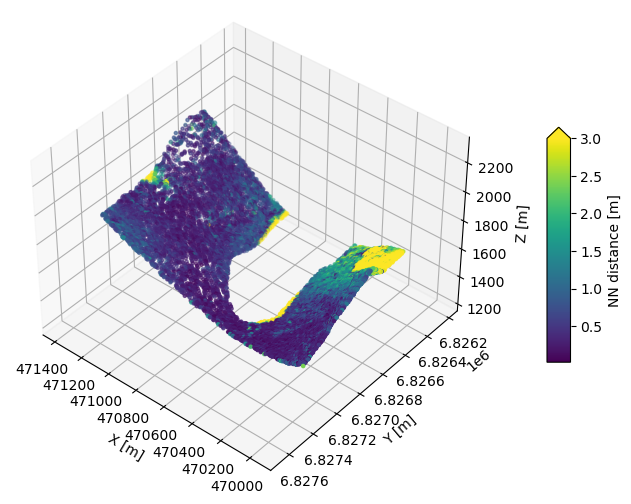

Median distances: 0.49 m
Stdev. of distances: 1.31 m


In [11]:
data_2009_aligned_noglacier = data_2009_aligned[~mask_polygon_2009]

# query indices of nearest neighbors of aligned 2009 coordinates in 2017 kd-tree
nn_dists = tree2017.query(data_2009_aligned_noglacier, k=1)

# obtain distances as first element in tuple returned by query above
distances = nn_dists[0]

# create a figure with 3D axis (two columns for different coloring)
fig, ax = plt.subplots(1,1,subplot_kw={"projection": "3d"},figsize=(7,5))

nth=100

# plot the point cloud colored by distances
s = ax.scatter(data_2009_aligned_noglacier[::nth,0], data_2009_aligned_noglacier[::nth,1], data_2009_aligned_noglacier[::nth,2], s=5,
                   c=distances[::nth], vmax=3.0)
ax.set_aspect('equal')

# label axes and add title
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')

# set initial view of 3D plot
ax.view_init(elev=40., azim=130.)

# add a colorbar
fig.colorbar(s, shrink=.5, aspect=10, label='NN distance [m]', ax = ax, pad=0.1, extend='max')

# show the plot
plt.tight_layout()
plt.show()

print(f'Median distances: {np.median(distances):.2f} m')
print(f'Stdev. of distances: {np.std(distances):.2f} m')

The statistics show that the overall alignment has strongly improved, in agreement with the visualization above. Larger distances remain at the edge of the glacier (yellow, >3.0 m). We can assume that this is cause by actual surface distances, as we expect changes of the glacier body - parts of which may have been contained in the masked point cloud. Another area of large distances (yellow path in the upper right of the plot) is probably also an area where considerable surface change occurred. Since the majority of our 'no glacier' points show small distances (median of 0.5 m), we can visually confirm that the alignment worked out quite well (within the expected accuracy of these data). Be aware that the performance of the ICP largely depends on how many points of 'changed areas' influence the derived transformation. If too many change points are contained, the ICP will overfit to these, we obtain larger distances in actually stable parts and an overall poor alignment result. 

By writing the point clouds to las files, we can assess the alignment visually, e.g. in CloudCompare. Such a check is always advisable, because it can uncover unwanted effects, where the alignment deteriorates in parts where we are sure that they should well-align (e.g. some rock surface or other distinct, solid morphology). It is therefore important not to rely only on the statistical descriptors of ICP performance, which may be fairly low for a local optimum (point subsets of selected stable areas) but not represent the global optimum of point distances.

In [12]:
las_data2009_aligned = f'{data_path}/hellstugubrean_2009_aligned.las'
pcfuncs.write_las(data_2009_aligned, las_data2009_aligned)

<center>
<img src="media/m3_theme3_glacier_alignment.png" alt="glacier alignment in CloudCompare" title="Visual assessment of point cloud alignment in CloudCompare" width="800">

<i>Visual assessment of point cloud alignment in CloudCompare by comparing the point cloud epochs in single colors (red: reference (2017), blue: aligned (2009)). The points fit well on the surfaces on the mountain flanks, a large gap is obvious at the glacier surface. This part is the target of change analysis and was excluded from the ICP-based derivation of the rigid transformation. Another area of offset becomes apparent in the right subfigure, which may stem from snow cover in this part in the 2009 epoch. Since the remaining points on the mountain flank fit well, we can assume that the influence of this area on the ICP alignment was acceptably small. Figure by course authors.</i></center>

Note that in our exercise we are using the same area ('no glacier') to derive the alignment and assess the alignment accuracy. In real analysis, it is recommended to use two separate subsets of the data, i.e. one set of stable areas to derive the transformation using ICP, and another set of stable areas to derive the (residual) distances between the aligned epochs. Both subsets are ideally spatially distributed in the scene, so that a bias towards certain areas is avoided and a stable solution is found for the target (changed) area.

<a id='change-detection-and-quantification'></a>
### Change detection and quantification (surface change analysis)

After co-registration and fine alignment of our point cloud epochs, we can perform the actual surface change analysis. We will use the <a href="#surface-change-analysis">M3C2 algorithm</a> (<a href="#references">Lague et al., 2013</a>) to quantify change (i.e. distances) between surfaces in the Hellstugubrean point clouds from 2009 to 2017.

The M3C2 algorithm is available in CloudCompare with a graphical user interface. Since you already got familiar with [point cloud processing in Python](../02_pointcloud_programming_python/02_pointcloud_programming_python.ipynb) and we are interested in automating the analysis for potentially large series of point clouds, we will use the M3C2 implementation in the [open source Python library](https://github.com/3dgeo-heidelberg/py4dgeo) `py4dgeo`. The package is contained in the Python environment of this course, or can be installed via pip - see the documentation for further information on installation and basic usage: https://py4dgeo.readthedocs.io/en/latest/index.html.

`py4dgeo` works with `Epoch` objects, which can be created from las files or directly input as `numpy` arrays of shape `n x 3` (containing the XYZ coordinates).

In [ ]:
# import the library for M3C2 distance calculation
import py4dgeo

# load point clouds as epoch objects
epoch_2009, epoch_2017 = py4dgeo.read_from_las(
    las_data2009_aligned, las_data2017
)

As core points, we could use a subsampled version of one of the input point clouds or a regular sampling of the scene. In this exercise, we will use all points of the sparser point cloud in 2009, for which the distances to the 2017 epoch shall be derived:

In [14]:
corepoints = epoch_2009.cloud[::]

In the next step, we instantiate the `M3C2` algorithm class, where we specify the parameters of the algorithm. With the `epochs`, we specify the two point clouds (arrays with XYZ coordinates) for change quantification. Therein, the first epoch acts as the reference epoch, and the second as the compared epoch. In our case, changes are hence derived from 2009 to 2017. The `corepoints` parameters takes as input the 3D coordinates at which the M3C2 distance should be computed (considering all original points of the input epochs). `normal_radii` specifies the radius for estimating the local surface normals. According to the M3C2 algorithm, a multi-scale normal estimation is possible, for which the normal radius with highest planarity of the locally adjusted surface is selected at each core point. For our glacier dataset, we specify a minimum radius of `2.0 m` with steps of `1.0 m` radius increase up to a maximum radius of `8.0 m`. We define a separate radius for the cylinder spanned in normal direction with `cyl_radii`. All points within this radius from the respective core point are used to average the position for subsequent distance quantification. The `max_distance` parameter sets the length of the cylinder, and thereby the maximum distance to search for points in the other epoch. If not set, the distance defaults to the cylinder radius (which is too small for most expected use cases, so it is important to set this parameter). Finally, we specify the `registration_error` in our algorithm, from which the level of detection is derived. We set the registration error to the standard deviation of cloud-to-cloud distances in unchanged areas of our scene (see above). If not set, no registration error is considered (i.e. default is `0.0`).

In [15]:
m3c2 = py4dgeo.M3C2(
    epochs=(epoch_2009, epoch_2017),
    corepoints=corepoints,
    normal_radii=(2.0, 1.0, 8.0),
    cyl_radii=(2.0,),
    max_distance=(50.0),
    registration_error=(1.31)
)

As a final step, we just need to run the distance calculation, which returns the `distances` and a structured array of all variables relating to `uncertainties`. 

In [16]:
m3c2_distances, uncertainties = m3c2.run()

[2023-02-17 16:10:17][INFO] Building KDTree structure with leaf parameter 10
[2023-02-17 16:10:17][INFO] Building KDTree structure with leaf parameter 10


The calculated result is an array with **one distance per core point**. The order of distances corresponds exactly to the order of input core points. Corresponding to the derived distances, an **uncertainty array** is returned which contains several quantities that can be accessed individually: The level of detection `lodetection`, the spread of the distance across points in either cloud (`spread1` and `spread2`, by default measured as the standard deviation of distances) and the total number of points taken into consideration in either cloud (`num_samples1` and `num_samples2`).

In [17]:
m3c2_distances

array([-3.56735986, -3.54197136, -3.5456269 , ..., -0.88864044,
       -0.92088742, -0.96017669])

In [18]:
uncertainties['lodetection']

array([2.59091504, 2.58815035, 2.5887849 , ..., 2.61745518, 2.62151081,
       2.59732118])

We can now visualize the distances and corresponding level of detection in the scene:

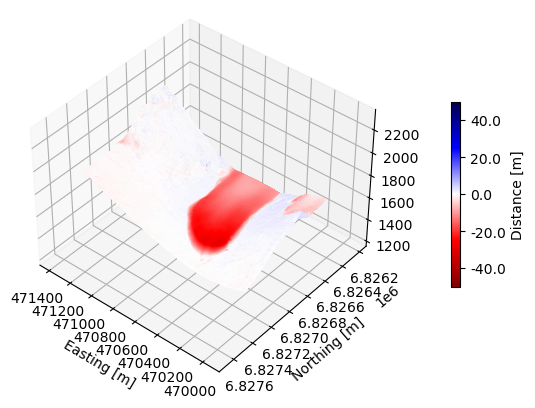

In [19]:
# create the figure
fig, ax = plt.subplots(1, 1, figsize=(7,4), subplot_kw={"projection": "3d"})

# plot the distances
d = ax.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=m3c2_distances, cmap='seismic_r', vmin=-50, vmax=50, s=1) 
plt.colorbar(d, format=('%.1f'), label='Distance [m]', shrink=.5, pad=.1)

# add plot elements
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_aspect('equal')
ax.view_init(elev=40., azim=130.)

plt.tight_layout()
plt.show()

The M3C2 distances show highest values in the area of the glacier, which sticks out in red, i.e. negative surface change. From 2009 to 2017, this represents surface decrease and you will immediately associate it to glacier mass loss. Two more red patches of surface decrease are visible on both flanks adjacent to the glacier area. In the eastern part, we already assumed presence of snow in the 2009 epoch during the coregistration process. This snow not being present in 2017 yields negative surface change. On the opposite flank, the surface decrease may similarly be caused by the changing presence of snow, but further possibilities are erosion of surface material or rock falls. Relating the derived surface change to underlying processes requires more in-depth examination of the local situation, either in the data, from complementary measurements, or from in-situ knowledge.

<a id='uncertainty-of-change-analysis'></a>
### Uncertainty of change analysis



We will now look into the uncertainties associated to our change analysis results. As introduced in theory above, the M3C2 provides a spatially variable estimate of the uncertainty, which considers the global registration error of two epochs (i.e. our alignment accuracy), as well as the local surface roughness and point density. Based on a statistical test, this yields the level of detection at a location. If the quantified change is larger than the level of detection, we consider the change statistically significant, otherwise it is not significant.

Let's visualize the level of detection compared to our change quantification, and derive the significance of change per point from our results:

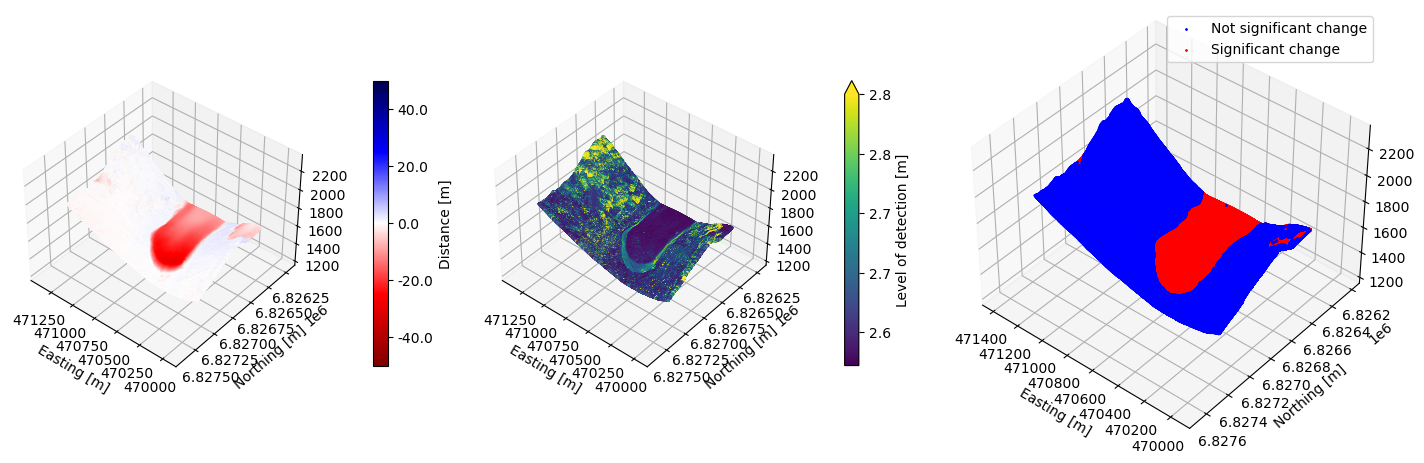

In [20]:
# create a binary mask of significant change
change_sign = np.where(abs(m3c2_distances) > uncertainties['lodetection'], True, False)

# create the figure
fig, axs = plt.subplots(1, 3, figsize=(14,6), subplot_kw={"projection": "3d"})
ax1,ax2,ax3 = axs

# plot the distances
d = ax1.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=m3c2_distances, cmap='seismic_r', vmin=-50, vmax=50, s=1) 
plt.colorbar(d, format=('%.1f'), label='Distance [m]', ax=ax1, shrink=.5, pad=.15)

# plot the level of detection values
l = ax2.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=uncertainties['lodetection'], cmap='viridis', vmax=2.8, s=1) 
plt.colorbar(l, format=('%.1f'), label='Level of detection [m]', ax=ax2, extend='max', shrink=.5, pad=.15)

# plot the significant change values (boolean)
ax3.scatter(corepoints[~change_sign][:,0], corepoints[~change_sign][:,1], corepoints[~change_sign][:,2], label='Not significant change', c='blue', s=1) 
ax3.scatter(corepoints[change_sign][:,0], corepoints[change_sign][:,1], corepoints[change_sign][:,2], label='Significant change', c='red', s=1) 
ax3.legend()

# add plot elements
for ax in axs:
    ax.set_xlabel('Easting [m]')
    ax.set_ylabel('Northing [m]')
    ax.set_aspect('equal')
    ax.view_init(elev=40., azim=130.)

plt.axis('equal')
plt.tight_layout()
plt.show()

From the level of detection, we can derive that the main area of significant change is the glacier tongue (right plot showing `level of detection` > `change`). This is an intuitive result, as we quantified surface decrease in ranges of -10 to -40 m, whereas the level of detection is well below 3 m. Notably, the area of the glacier tongue yields homogeneously low level of detection values (middle plot above). This is likely related mainly to the surface roughness in our point cloud data, which is low at our planarity scales of several meters compared to the rougher surface on the mountain flanks, featuring debris and topographic features. The plot visualizes nicely how the surface roughness - in terms of level of detection - is fairly high at the glacier boundary, where planarity decreases due to the change in morphologic units.

The relation of derived changes to the associated uncertainties is an important aspect for the representation of change analysis results, and ultimately for their interpretation. This will be elaborated in the <a href="#representation-of-change-analysis-results">subsequent section</a>. For now, we conclude by storing the results to point cloud files:

In [21]:
# name of output las file
las_results = f'{data_path}/hellstugubrean_changes_2009_2017.las'

# dictionary with attributes from M3C2 change analysis
change_data = {'m3c2_distance':m3c2_distances, 'lodetection':uncertainties['lodetection'], 'sig_change': change_sign.astype(int)}

# write corepoints and attributes to las using our write function
pcfuncs.write_las(corepoints, las_results, attribute_dict=change_data)

<a id='representation-of-change-analysis-results'></a>
### Representation of change analysis results

There are different approaches to representing, i.e. communicating, results of change analysis, depending on the objective and required information of the analysis task. The simplest form of change representation is **binary change**. This separation into changed and unchanged areas is equivalent to displaying significant change resulting from our M3C2 analysis.

One more level of information is added via a **triple change mask**, which distinguishes positive and negative change, and no change. Accordingly, you could choose three colors to plot the change map in a manner similar to the significant/non-significant change above. If you are running the exercise notebook by yourself, go for it!

The full information directly resulting from the **change quantification** would be to plot the change values themselves, as we did above with our M3C2 distances. Here especially, it is important to always provide additionally the **associated uncertainties**. We may observe quite high change values but also high level of detection values in some areas. This must be put into context by the human interpreter. Therein, it is recommended not to solely rely on the level of detection as threshold, but rather considering the actual uncertainty values and their spatial distribution. To get further into this aspect, you may read <a href="#references">Anderson (2019)</a>.

Seeing that we are dealing with 3D change analysis, we actually have even more information about the change properties of our surfaces. Where the scene geometry is three-dimensional (i.e. no flat, predominant change direction), the **direction of changes** can be of particular interest. For our M3C2 change analysis, we can derive the change direction from the normals estimation. In `py4dgeo`, the normal vector directions can be accessed in the `M3C2` algorithm object:

In [22]:
directions = m3c2.directions()
directions

array([[ 0.20199503,  0.10329517,  0.97392408],
       [ 0.19820585,  0.10382951,  0.97464551],
       [ 0.20006672,  0.1033419 ,  0.97431707],
       ...,
       [-0.50224166, -0.28419147,  0.81669365],
       [-0.49335208, -0.28829136,  0.82066547],
       [-0.49720595, -0.29223511,  0.81693628]])

We visualize the directions using an HSV color wheel, so that we can derive unique coloring for a combination of aspect and slope of the surface directions. We use pre-defined functions to obtain the aspect and slope from the normal vectors, which are contained in the [supplementary script](../../assets/python_functions/vector_functions.py) `vector_functions.py` (have a look at the code to understand how it works)..

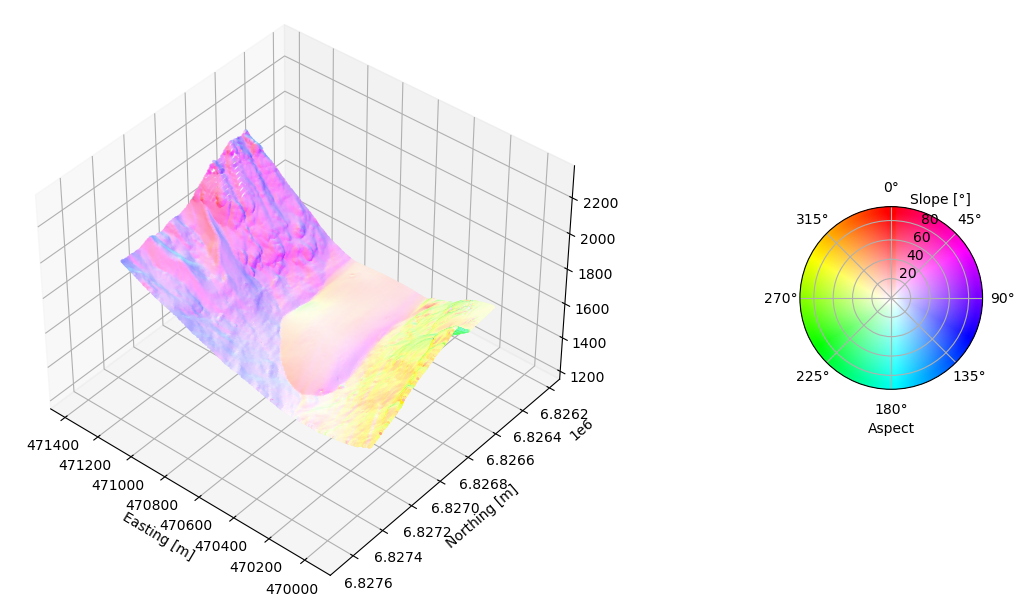

In [23]:
import math
import colorsys

# add the assets folder to the path, so that we can import supplementary Python functions 
import sys
from pathlib import Path
sys.path.insert(0, str((Path.cwd() / ".." / ".." / "assets/python_functions").resolve()))
import vector_functions as vfuncs

# derive aspect and slope values of directions (normal vector) per corepoint
slopes = np.array([vfuncs.getSlope(d) for d in directions])
aspects = np.array([vfuncs.getAspect(d) for d in directions])

# normalize values for hsv/rgb derivation
slope_max = np.max(slopes)
slopes = slopes/slope_max
aspects = aspects/np.max(aspects)

# derive hsv values for aspect (h) and slope (s), v is constant
vs = np.ones_like(aspects).flatten().tolist() # value is constant
hsv_dirs = np.array([colorsys.hsv_to_rgb(*x) for x in zip(aspects,slopes,vs)])

# initialize the figure
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(121, projection='3d')
#ax2 = plt.subplot()
ax2 = fig.add_subplot(324, projection='polar')

# plot the 3D directions and color by HSV
d = ax1.scatter(corepoints[::10,0], corepoints[::10,1], corepoints[::10,2], c=hsv_dirs[::10], s=1) #, vmin=-50, vmax=50, s=1

ax1.set_xlabel('Easting [m]')
ax1.set_ylabel('Northing [m]')
ax1.set_aspect('equal')
ax1.view_init(elev=40., azim=130.)


# plot the HSV color wheel (legend)
rho = np.linspace(0,1,100) # Radius of 1, distance from center to outer edge
phi = np.linspace(0, math.pi*2.,1000 ) # in radians, one full circle

RHO, PHI = np.meshgrid(rho,phi) # get every combination of rho and phi

h = (PHI-PHI.min()) / (PHI.max()-PHI.min()) # use angle to determine hue, normalized from 0-1
h = np.flip(h)        
s = RHO               # saturation is set as a function of radias
v = np.ones_like(RHO) # value is constant

# convert the np arrays to lists. This actually speeds up the colorsys call
h,s,v = h.flatten().tolist(), s.flatten().tolist(), v.flatten().tolist()
c = np.array([colorsys.hsv_to_rgb(*x) for x in zip(h,s,v)])

ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.scatter(PHI, RHO*slope_max, c=c)
ax2.set_xlabel('Aspect')
ax2.text(0.2,100,'Slope [°]')

plt.tight_layout()

All these visualizations are strongly depending on the information to be communicated. Based on all these information components (change values, uncertainties, directions, ...), a next analysis could be a classification of observed changes, for example, into the **types of changes**, which can ultimately be related to the underlying processes. For our glacier example, a simple approach could be to classifiy changes with large magnitude and strong vertical direction component as glacier mass loss change. A stronger horizontal change component is contained on the mountain flanks, where change (if significant) could be associated to presence of snow cover in one epoch. As you can imagine, this **post-classification** can be very complex and challenging in real scenarios with scenes features (typically a variety of) natural phenomena.

We will conclude the lesson part of this theme at this point. It is time to proceed with the self-evaluation, so that you are (hopefully) ready to proceed with the exercise and getting your hands on your own analysis of geomorphic change in multitemporal 3D point clouds.

<a id='self-evaluation-quiz'></a>
## Self-evaluation quiz

<form name="quiz" action="" method="post" onsubmit="evaluate_quiz(); return false">
<!--Question 1-->
<label for="q_01">
What main properties can change in point clouds and are usually assessed in change analysis?
</label><br>
<textarea rows = "5" cols = "50" name = "q_01"></textarea><br>

<div id="correct_q_01" hidden="">

Geometry and any attributes; assessment of biophysical, chemical, geometric, morphologic properties
  
</div>

<output id="output_q_01">
</output>
    
<br><br>   


<!--Question 2-->
<label for="q_02">
What is the difference between change detection and change analysis?
</label><br>
<textarea rows = "5" cols = "50" name = "q_02"></textarea><br>
    
<div id="correct_q_02" hidden="">

Change detection is a binary assessment if change occurred or not. Change analysis regards the quantification of change and/or assessment of change properties.
  
</div>

<output id="output_q_02">
</output>
    
<br><br>   
 
<!--Question 3-->
<label for="q_03">
Assign the following examples of change analysis to the respective dimensionality:
</label><br>
<!--1st table - contains select elements-->
<table>
<tr>
    <td><select name="q_03"> 
		<option></option>
		<option>A</option>
		<option>B</option>
		<option>C</option>
		<option>D</option>
	</select>
	horizontal displacement of objects or features in, e.g., object tracking</td>
	<td><select name="q_03"> 
		<option></option>
		<option>A</option>
		<option>B</option>
		<option>C</option>
		<option>D</option>
	</select>
	surface increase or lowering in, e.g., topographic monitoring</td>
</tr>
<tr>
	<td><select name="q_03"> 
		<option></option>
		<option>A</option>
		<option>B</option>
		<option>C</option>
		<option>D</option>
	</select>
	geometric change in size and/or shape, object or surface deformation in, e.g. geomorphic monitoring</td>
	<td><select name="q_03"> 
		<option></option>
		<option>A</option>
		<option>B</option>
		<option>C</option>
		<option>D</option>
	</select>
	changes in geometry and feature space of, e.g. vegetation</td>
	
</table>

<!--2nd table - contains corresponding answers-->
<table>
<tr>
	<td>A. 1D changes </td>
	<td>B. 2D changes  </td>
</tr>
<tr>
	<td>C. 3D changes </td>
	<td>D. higher-dimensional (>3D) changes </td>
</tr>
</table><br>

<div id="correct_q_03" hidden="">

B A C D
  
</div>

<output id="output_q_03">
</output>
    
<br><br>   
    
<!--Question 4-->    
<label for="q_04">
List the typical steps in object-based change analysis
</label><br>
<textarea rows = "5" cols = "50" name = "q_04"></textarea><br>

<div id="correct_q_04" hidden="">

Object extraction, object identification (between epochs), object characterization, monitoring
  
</div>

<output id="output_q_04">
</output>
    
<br><br>   

    
<!--Question 5-->       
<label for="q_05">
Which are the main methods for surface change analysis using multitemporal point clouds?
</label><br>
<textarea rows = "5" cols = "50" name = "q_05"></textarea><br>

<div id="correct_q_05" hidden="">

DEM differencing, cloud-to-cloud distances (C2C), multi-scale model-to-model cloud comparison (M3C2)
  
</div>

<output id="output_q_05">
</output>
    
<br><br>   
       
<!--Question 6-->    
<label for="q_06">
What is the main disadvantage of DEM differencing over full 3D change analysis?
</label><br>
<input type="radio" name="q_06"> analysis of rasters is computationally complex and requires long processing times<br>
<input type="radio" name="q_06"> change direction is restricted to one dimension, usually vertically<br>
<input type="radio" name="q_06"> vegetation needs to be removed before analyzing terrain changes<br>

<div id="correct_q_06" hidden="">

change direction is restricted to one dimension, usually vertically
  
</div>

<output id="output_q_06">
</output>
    
<br><br>       
       

<!--Question 7-->
<label for="q_07">
What is the central underlying assumption of point cloud distance computation with the M3C2 algorithm?
</label><br>
<input type="radio" name="q_07"> local planarity is assumed to derive change in direction of the surface orientation<br>
<input type="radio" name="q_07"> homogeneous density is assumed to reduce uncertainty due to effects of point sampling<br>
<input type="radio" name="q_07">change directions are assumed mainly parallel to the surface, using distinct features for deriving distances<br>

<div id="correct_q_07" hidden="">

local planarity is assumed to derive change in direction of the surface orientation
  
</div>

<output id="output_q_07">
</output>
    
<br><br>    

<!--Question 8-->   
<label for="q_08">
Which variables are considered by the spatially variable uncertainty modelled in the M3C2 (Level of Detection)?
</label><br>
<input type="radio" name="q_08"> LiDAR intensity, roughness, point density<br>
<input type="radio" name="q_08"> Roughness, point density, registration error<br>
<input type="radio" name="q_08">Point density, registration error, incidence angle<br>

<div id="correct_q_08" hidden="">

Roughness, point density, registration error
  
</div>

<output id="output_q_08">
</output>
    
<br><br>        
    
  
<!--Question 9-->    
<label for="q_09">
Sort the following change representations by the contained level of information (least (1) to most (4)):
</label><br>
<!--1st table - contains select elements-->
<table>
<tr>
    <td><select name="q_09"> 
		<option></option>
		<option>1</option>
		<option>2</option>
		<option>3</option>
		<option>4</option>
	</select>
	Triple change mask (positive, negative, and no change)</td>
	<td><select name="q_09"> 
		<option></option>
		<option>1</option>
		<option>2</option>
		<option>3</option>
		<option>4</option>
	</select>
	Triple change mask (positive, negative, and no change)</td>
</tr>
<tr>
	<td><select name="q_09"> 
		<option></option>
		<option>1</option>
		<option>2</option>
		<option>3</option>
		<option>4</option>
	</select>
	Binary change</td>
	<td><select name="q_09"> 
		<option></option>
		<option>1</option>
		<option>2</option>
		<option>3</option>
		<option>4</option>
	</select>
	Type change (post-classification)</td>
	
</table>
    
<div id="correct_q_09" hidden="">

2 3 1 4
  
</div>

<output id="output_q_09">
</output>
    
<br><br>        

<!--Question 10-->    
<label for="q_10">
What is an important caveat when using the level of detection to filter out non-significant changes from the result?
</label><br>
<textarea rows = "5" cols = "50" name = "q_10"></textarea><br>

<div id="correct_q_10" hidden="">

The level of detection describes a confidence interval at which the change quantification is statistically significant. Change values below the corresponding level of detection may nonetheless represent actual changes, but would be discarded as ‘no change’ by filtering. It is therefore recommended to consider the level of detection value as associated uncertainty, rather than removing such changes from the subsequent analysis.
  
</div>

<output id="output_q_10">
</output>
    
<br><br>   

<input type="submit" value="Submit" style="font-size:14pt"><br><br>

<output id="output_overall">
</output>
</form>

<a id='exercise'></a>
## Exercise

Made it through the quiz? Then you are ready for the exercise - proceed with the next part using the button at the bottom of this page.

<a id='references'></a>
## Literature
<a id='literature'></a>

<a id='key-papers-to-read'></a>
### Key papers to read

1. Qin, R., Tian, J., & Reinartz , P. (2016). 3D change detection Approaches and applications. ISPRS Journal of Photogrammetry and Remote Sensing, 122 , pp. 41 56. doi: [10.1016/j.isprsjprs.2016.09.013](https://doi.org/10.1016/j.isprsjprs.2016.09.013).
2. Lague, D., Brodu, N., & Leroux, J. (2013). Accurate 3D comparison of complex topography with terrestrial laser scanner: Application to the Rangitikei canyon (N-Z). ISPRS Journal of Photogrammetry and Remote Sensing, 82, pp. 10-26. doi: [10.1016/j.isprsjprs.2013.04.009](https://doi.org/10.1016/j.isprsjprs.2013.04.009).
3. James, M. R., Robson, S., & Smith, M. W. (2017). 3D uncertainty based topographic change detection with structure from motion photogrammetry: precision maps for ground control and directly georeferenced surveys. Earth Surface Processes and Landforms, 42 (12), pp. 1769 1788. doi: [10.1002/esp.4125](https://doi.org/10.1002/esp.4125).


### References
* Anderson, S. W. (2019). Uncertainty in quantitative analyses of topographic change: error propagation and the role of thresholding. Earth Surface Processes and Landforms, 44 (5), pp. 1015-1033. doi: [10.1002/esp.4551](https://doi.org/10.1002/esp.4551).
* Barnhart, T. & Crosby, B. (2013). Comparing Two Methods of Surface Change Detection on an Evolving Thermokarst Using High-Temporal-Frequency Terrestrial Laser Scanning, Selawik River, Alaska. Remote Sensing, 5(6), pp. 2813–2837. doi: [10.3390/rs5062813](https://doi.org/10.3390/rs5062813).
* Besl, P. J., & McKay, N. D. (1992). A Method for Registration of 3-D Shapes. IEEE Transactions on Pattern Analysis and Machine Intelligence, 14 (2), pp. 239-256. doi: [10.1109/34.121791](https://doi.org/10.1109/34.121791).
* Chen, J., Chen, Y., & Liu, Z. (2022). Extraction of Forestry Parameters Based on Multi-Platform LiDAR. IEEE Access, 10, pp. 21077-21094. doi: [10.1109/ACCESS.2022.3151685](https://doi.org/10.1109/ACCESS.2022.3151685).
* Corbí, H., Riquelme, A., Megías-Baños, C., & Abellan, A. (2018). 3-D Morphological Change Analysis of a Beach with Seagrass Berm Using a Terrestrial Laser Scanner. ISPRS International Journal of Geo-Information, 7 (234), pp. 15. doi: [10.3390/ijgi7070234](https://doi.org/10.3390/ijgi7070234).
* Cserép, M., & Lindenbergh, R. (2023). Distributed processing of Dutch AHN laser altimetry changes of the built-up area. International Journal of Applied Earth Observation and Geoinformation, 116, pp. 103174. doi: [10.1016/j.jag.2022.103174](https://doi.org/10.1016/j.jag.2022.103174).
* Eitel, J. U. H., Höfle, B., Vierling, L. A., Abellán, A., Asner, G. P., Deems,J. S., Glennie, C. L., Joerg, P. C., LeWinter, A. L., Magney, T. S., Mandlburger, G., Morton, D. C., Müller, J., & Vierling, K. T. (2016). Beyond 3D: The new spectrum of lidar applications for earth and ecological sciences. Remote Sensing of Environment, 186 , pp. 372-392. doi: [10.1016/j.rse.2016.08.018](https://doi.org/10.1016/j.rse.2016.08.018).
* Girardeau-Montaut, D., Roux, M., Marc, R., & Thibault, G. (2005). Change detection on points cloud data acquired with a ground laser scanner. ISPRS Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences, XXXVI-3/W19, pp. 30-35.
* Gómez-Gutiérrez, A. & Gonçalves G. R. (2020). Surveying coastal cliffs using two UAV platforms (multirotor and fixed-wing) and three different approaches for the estimation of volumetric changes. International Journal of Remote Sensing, 41(21), pp. 8143-8175. doi: [10.1080/01431161.2020.1752950](https://doi.org/10.1080/01431161.2020.1752950).
* Gojcic, Z., Schmid, L., & Wieser, A. (2021). Dense 3D displacement vector fields for point cloud-based landslide monitoring. Landslides, 18(12), 3821-3832. doi: [10.1007/s10346-021-01761-y](https://doi.org/10.1007/s10346-021-01761-y).
* James, M. R., Robson, S., & Smith, M. W. (2017). 3D uncertainty based topographic change detection with structure from motion photogrammetry: precision maps for ground control and directly georeferenced surveys. Earth Surface Processes and Landforms, 42 (12), pp. 1769 1788. doi: [10.1002/esp.4125](https://doi.org/10.1002/esp.4125).
* Lague, D., Brodu, N., & Leroux, J. (2013). Accurate 3D comparison of complex topography with terrestrial laser scanner: Application to the Rangitikei canyon (N-Z). ISPRS Journal of Photogrammetry and Remote Sensing, 82, pp. 10-26. doi: [10.1016/j.isprsjprs.2013.04.009](https://doi.org/10.1016/j.isprsjprs.2013.04.009).
* Marx, S., Anders, K., Antonova, S., Beck, I., Boike, J., Marsh, P., Langer, M., & Höfle, B. (2017). Terrestrial laser scanning for quantifying small-scale vertical movements of the ground surface in Artic permafrost regions. Earth Surf. Dynam. Discuss., 2017, pp. 1-31. doi: [10.5194/esurf-2017-49](https://doi.org/10.5194/esurf-2017-49).
* Mayr, A., Rutzinger, M., Bremer, M., Oude Elberink, S., Stumpf, F., & Geitner, C. (2017). Object-based classification of terrestrial laser scanning point clouds for landslide monitoring. The Photogrammetric Record, 32 (160), pp. 377-397. doi: [10.1111/phor.12215](https://doi.org/10.1111/phor.12215).
* Mayr, A., Rutzinger, M., & Geitner, C. (2018). Multitemporal Analysis of Objects in 3D Point Clouds for Landslide Monitoring. International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences, XLII-2, pp. 691-697. doi: [10.5194/isprs-archives-XLII-2-691-2018](https://doi.org/10.5194/isprs-archives-XLII-2-691-2018).
* Rossini, M., Di Mauro, B., Garzonio, R. & Baccolo, G. (2018). Rapid melting dynamics of an alpine glacier with repeated UAV photogrammetry. Geomorphology, 304, pp. 159-172. doi: [10.1016/j.geomorph.2017.12.039](https://doi.org/10.1016/j.geomorph.2017.12.039).
* Shen, Y., Lindenbergh, R., & Wang, J. (2017). Change analysis in structural laser scanning point clouds: The baseline method. Sensors, 17(1), 26. doi: [10.3390/s17010026](https://doi.org/10.3390/s17010026).
* Soudarissanane, S., Lindenbergh, R., Menenti, M., & Teunissen, P. (2011). Scanning geometry: Influencing factor on the quality of terrestrial laser scanning points. ISPRS Journal of Photogrammetry and Remote Sensing, 66 (4), pp. 389-399. doi: [10.1016/j.isprsjprs.2011.01.005](http://dx.doi.org/10.1016/j.isprsjprs.2011.01.005).
* Wheaton, J. M., Brasington, J., Darby, S. E., & Sear, D. A. (2010). Accounting for uncertainty in DEMs from repeat topographic surveys: improved sediment budgets. Earth Surface Processes and Landforms, 35 (2), pp. 136-156. doi: [10.1002/esp.1886](https://doi.org/10.1002/esp.1886).
* Williams, J. G. (2017). Insights into Rockfall from Constant 4D Monitoring. PhD thesis, Durham University. URL: http://etheses.dur.ac.uk/12172/.
* Williams, J. G., Anders, K., Winiwarter, L., Zahs, V., & Höfle, B. (2021). Multi-directional change detection between point clouds. ISPRS Journal of Photogrammetry and Remote Sensing, 172, pp. 95-113. doi: [10.1016/j.isprsjprs.2020.12.002](https://doi.org/10.1016/j.isprsjprs.2020.12.002).
* Winiwarter, L., Anders, K., & Höfle, B. (2021). M3C2-EP: Pushing the limits of 3D topographic point cloud change detection by error propagation. ISPRS Journal of Photogrammetry and Remote Sensing, 178, pp. 240-258. doi: [10.1016/j.isprsjprs.2021.06.011](https://doi.org/10.1016/j.isprsjprs.2021.06.011).
* Xiao, W., Xu, S., Elberink, S. O. & Vosselman, G. (2016). Individual Tree Crown Modeling and Change Detection From Airborne Lidar Data. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 9(8), pp. 3467-3477. doi: [10.1109/JSTARS.2016.2541780](https://doi.org/10.1109/JSTARS.2016.2541780).
* Zahs, V., Hämmerle, M., Anders, K., Hecht, S., Sailer, R., Rutzinger, M., Williams, J. G., & Höfle, B. (2019). Multi-temporal 3D point cloud-based quantification and analysis of geomorphological activity at an alpine rock glacier using airborne and terrestrial LiDAR. Permafrost and Periglacial Processes, 30 (3), pp. 222-238. doi: [10.1002/ppp.2004](https://doi.org/10.1002/ppp.2004).
* Zahs, V., Winiwarter, L., Anders,K. Williams, J. ,G., Rutzinger, M. & Höfle, B. (2022). Correspondence-driven plane-based M3C2 for lower uncertainty in 3D topographic change quantification. ISPRS Journal of Photogrammetry and Remote Sensing, 183, pp. 541 - 559. doi: [10.1016/j.isprsjprs.2021.11.018](https://doi.org/10.1016/j.isprsjprs.2021.11.018).
